### 0) Is it a Static Page?

In [3]:
import requests
url = "http://quotes.toscrape.com/scroll"
website = requests.get(url)
print(website.text)

<!DOCTYPE html>
<html lang="en">
<head>
	<meta charset="UTF-8">
	<title>Quotes to Scrape</title>
    <link rel="stylesheet" href="/static/bootstrap.min.css">
    <link rel="stylesheet" href="/static/main.css">
    
    
</head>
<body>
    <div class="container">
        <div class="row header-box">
            <div class="col-md-8">
                <h1>
                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>
                </h1>
            </div>
            <div class="col-md-4">
                <p>
                
                    <a href="/login">Login</a>
                
                </p>
            </div>
        </div>
    
<div class="row">
    <div class="col-md-8">
        <div class="quotes"></div>
    </div>
</div>
<div id="loading" style="background-color: #eeeecc"><h5>Loading...</h5></div>
<script src="/static/jquery.js"></script>
<script>
    $(function(){
        var page = 1, tag = null, hasNextPage = true;
        function appendQu

### 1) Dependencies


In [4]:
!pip install selenium webdriver-manager


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\irmin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
#!pip install selenium webdriver-manager
import time
from bs4 import BeautifulSoup

from selenium import webdriver
from selenium.webdriver.chrome.service import Service

### 2) Configuración del Servicio y Driver

In [6]:
# Ruta al chromedriver (si no está en el PATH)
chrome_driver_path = "chromedriver.exe"

# Opcional: configurar opciones
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")  # Pantalla completa
options.add_argument("--disable-blink-features=AutomationControlled")  # Menos detectable

# Crear el servicio y el driver
service = Service(executable_path=chrome_driver_path)
driver = webdriver.Chrome(service=service, options=options)

### 3) Definir url

In [7]:
# Abrir un sitio dinámico de práctica
url = "http://quotes.toscrape.com/scroll"
driver.get(url)

# Espera a que se cargue el contenido dinámico
time.sleep(3)

### 4) Manipular HTML Renderizado


In [8]:
# Obtener el HTML renderizado
html = driver.page_source
driver.quit()

# Procesar el HTML con BeautifulSoup
soup = BeautifulSoup(html, "html.parser")
quotes = soup.select("div.quote")

print("Citas encontradas:", len(quotes))
for quote in quotes:
    text = quote.find("span", class_="text").get_text()
    author = quote.find("small", class_="author").get_text()
    print(f"{text} - {author}")

Citas encontradas: 10
“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.” - Albert Einstein
“It is our choices, Harry, that show what we truly are, far more than our abilities.” - J.K. Rowling
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.” - Albert Einstein
“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.” - Jane Austen
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.” - Marilyn Monroe
“Try not to become a man of success. Rather become a man of value.” - Albert Einstein
“It is better to be hated for what you are than to be loved for what you are not.” - André Gide
“I have not failed. I've just found 10,000 ways that won't work.” - Thomas A. Edison
“A woman is like a tea bag; you never know how strong it is until it's in hot 

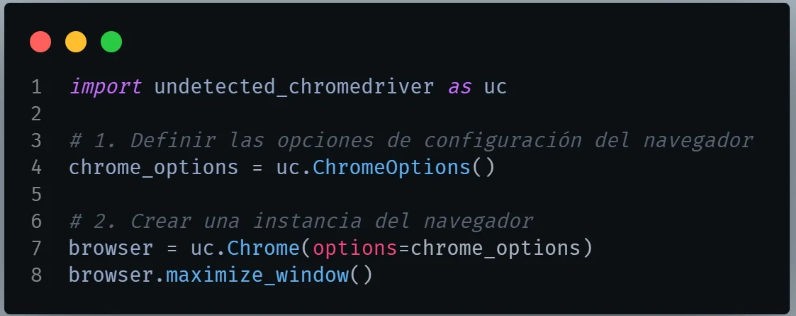